In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import pandas as pd
pd.read_csv("./exper_result.csv")[-10:]

,exper_id,average_loss_cov,n,eps,data_dim,mu,mu_out,par_reg1,learn_par,dicay_par,exper_iter,optim_iter,L,init_loc,date,time
193,191,4.6989,1000,0.2,10,0.0,1.0,0.005,0.10,0.5,10,1000,1,0.0,2022-12-10,16:07
194,192,1.2452,1000,0.2,10,0.0,1.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,17:34
195,193,54.0690,1000,0.2,10,0.0,6.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,18:04
196,194,1.2455,1000,0.2,10,0.0,1.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,18:32
197,195,54.5770,1000,0.2,10,0.0,6.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,19:01
198,196,1.6898,1000,0.2,10,0.0,1.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,19:30
199,197,7.1966,1000,0.2,10,0.0,6.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,19:59
200,192,5.2912,4000,0.2,10,0.0,6.0,0.005,0.10,0.5,20,1000,1,0.0,2022-12-10,20:03
201,198,2.1632,1000,0.2,10,0.0,1.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,20:26
202,199,6.8334,1000,0.2,10,0.0,6.0,0.005,0.05,0.5,10,1000,1,0.0,2022-12-10,20:52


In [37]:
pd.read_csv("./exper_result.csv")[160:166]

,exper_id,average_loss_cov,n,eps,data_dim,mu,mu_out,par_reg1,learn_par,dicay_par,exper_iter,optim_iter,L,init_loc,date,time
160,162,63.5470,50,0.2,10,0.0,6.0,0.005,0.2,0.3,20,2000,1,0.0,2022-12-09,00:20
161,163,6.5306,200,0.2,10,0.0,6.0,0.005,0.2,0.3,20,2000,1,0.0,2022-12-09,00:49
162,164,3.7389,400,0.2,10,0.0,6.0,0.005,0.2,0.3,20,2000,1,0.0,2022-12-09,01:37
163,165,3.6751,600,0.2,10,0.0,6.0,0.005,0.2,0.3,20,2000,1,0.0,2022-12-09,02:44
164,166,2.7294,800,0.2,10,0.0,6.0,0.005,0.2,0.3,20,2000,1,0.0,2022-12-09,04:09
165,167,3.3451,1000,0.2,10,0.0,6.0,0.005,0.2,0.3,20,2000,1,0.0,2022-12-09,05:54


In [76]:
mean_op=[]
std_op=[]
mean_f=[]
std_f=[]
slice=1
for i in range(169, 174):
    data_id = i
    file_name = "result/par"+str(data_id)+".npy"
    par = np.load(file=file_name)

    file_name = "result/cov"+str(data_id)+".npy"
    cov = np.load(file=file_name)

    file_name = "result/true_par"+str(data_id)+".npy"
    true_cov = np.load(file=file_name, allow_pickle=True)

    exper_iter, optim_iter, data_dim = cov.shape[:3]
    print(cov.shape)
    m=[]
    mf=[]
    for j in range(exper_iter):
        m.append(np.linalg.norm(cov[j]-true_cov[j], ord=2, axis=(1,2))[-1])       
        mf.append(np.linalg.norm(cov[j]-true_cov[j], ord='fro', axis=(1,2))[-1])
    m.sort()
    m = m[:-slice]
    mf.sort()
    mf = mf[:-slice]
    mean_op.append(np.mean(m))
    std_op.append(np.std(m))
    mean_f.append(np.mean(mf))
    std_f.append(np.std(mf))

(20, 2001, 10, 10)
(20, 2001, 10, 10)
(20, 2001, 10, 10)
(20, 2001, 10, 10)
(20, 2001, 10, 10)


<ErrorbarContainer object of 3 artists>

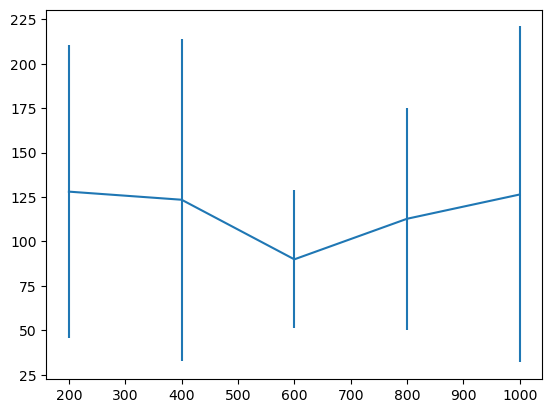

In [77]:
x=[200, 400, 600, 800, 1000]
plt.errorbar(x,mean_op, std_op)

<ErrorbarContainer object of 3 artists>

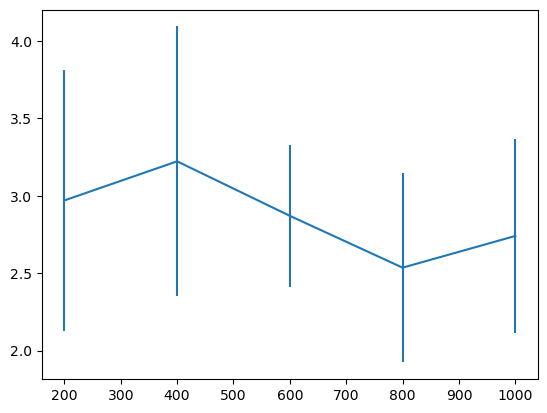

In [68]:
x=[200, 400, 600, 800, 1000]
plt.errorbar(x,mean_f, std_f)

In [23]:

data_id = 198
file_name = "result/par"+str(data_id)+".npy"
par = np.load(file=file_name)


file_name = "result/cov"+str(data_id)+".npy"
cov = np.load(file=file_name)

file_name = "result/true_par"+str(data_id)+".npy"
true_cov = np.load(file=file_name, allow_pickle=True)

file_name = "result/out_cov"+str(data_id)+".npy"
out_cov = np.load(file=file_name, allow_pickle=True)

exper_iter, optim_iter, data_dim = cov.shape[:3]
true_mean = 0; mean_vec = np.full(data_dim, true_mean)


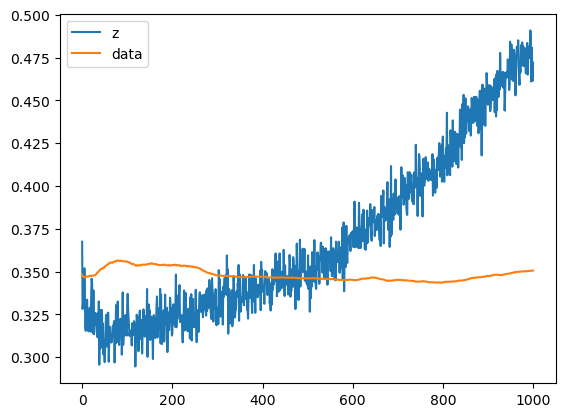

In [35]:
import sys
sys.path.append("../")
from libs.create import create_out_cov, create_norm_data
from libs.functions import sigmoid, g_lo, g_up, nearPD, sample_wise_vec_mat_vec,\
deriv_sigmoid, sample_wise_outer_product, init_covariance, init_discriminator

def discriminator(x, beta):
    size, data_dim = x.shape[0], x.shape[-1]
    beta = beta.reshape([data_dim,data_dim])
    value = sample_wise_vec_mat_vec(beta,x)
    return value
i=6
output=[]
output2=[]
data = create_norm_data(3000, 0.2, np.zeros(data_dim), true_cov[i], np.full(data_dim, 1), out_cov[i])
for j in range(optim_iter):
    z = np.random.multivariate_normal(np.zeros(data_dim), cov[i,j], 3000)
    output.append(sigmoid(discriminator(z, par[i,j,:-1])-par[i,j,-1]).mean(axis=0))
    output2.append(sigmoid(discriminator(data,par[i,j,:-1])-par[i,j,-1]).mean(axis=0))

plt.plot(output, label='z')
plt.plot(output2 ,label='data')
plt.legend()

In [36]:
def plot():
    cov_end = []
    
    for i in range(exper_iter):
        plt.subplots()
        loss_cov = LA.norm(cov[i] - true_cov[i], ord = 2, axis = (1,2))
        plt.plot(loss_cov)
        cov_end.append(loss_cov[-1])
    print("mean std : %.5f" %np.mean(cov_end))
    print("cov  std : %.5f" %np.std(cov_end))



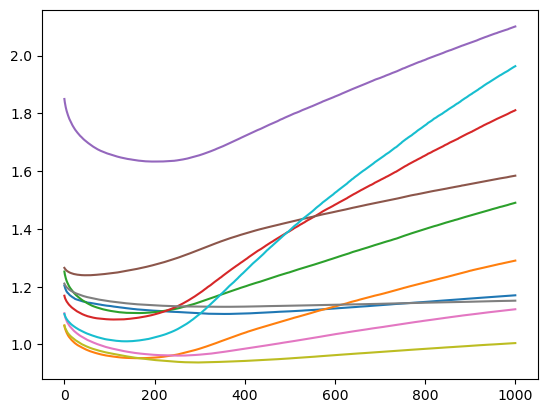

In [17]:
for i in range(10):
    plt.plot(cov[0,:,i,i])

mean std : 1.82194
cov  std : 0.88611


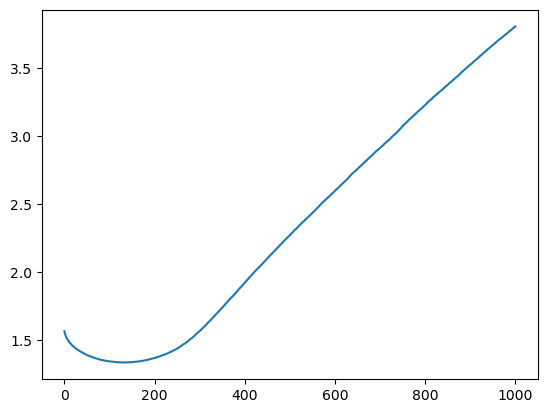

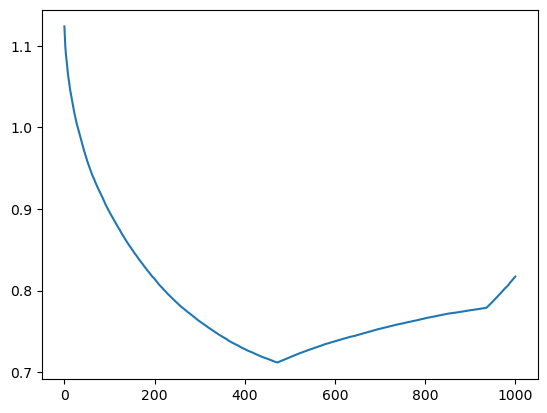

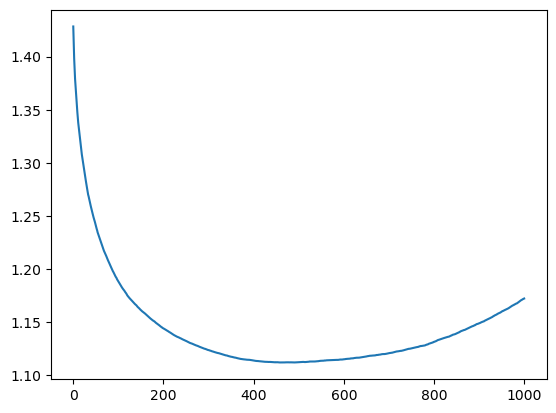

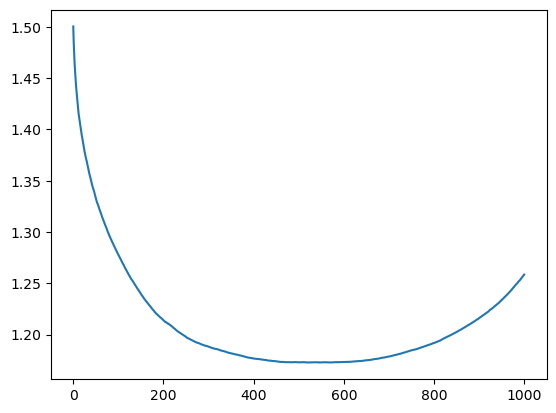

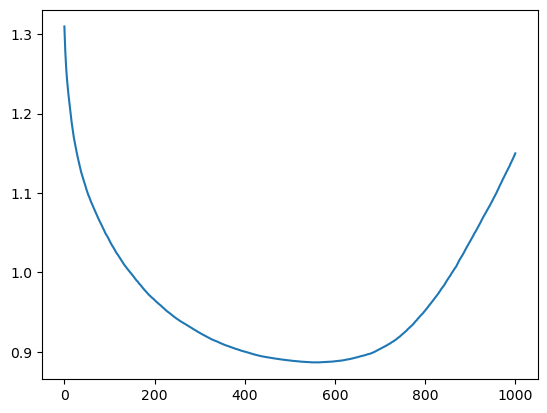

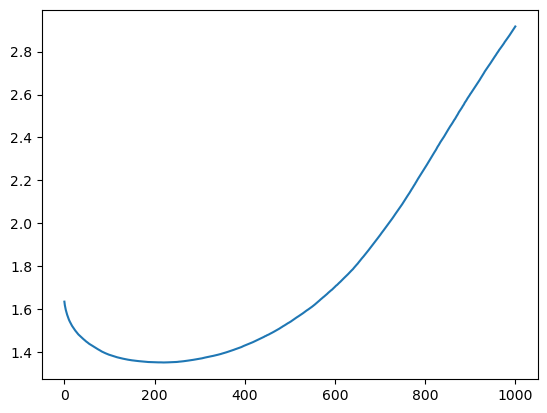

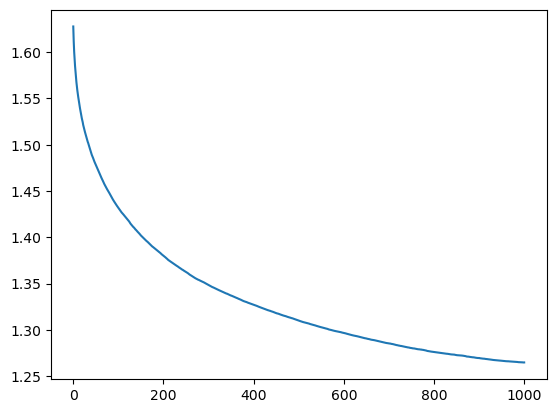

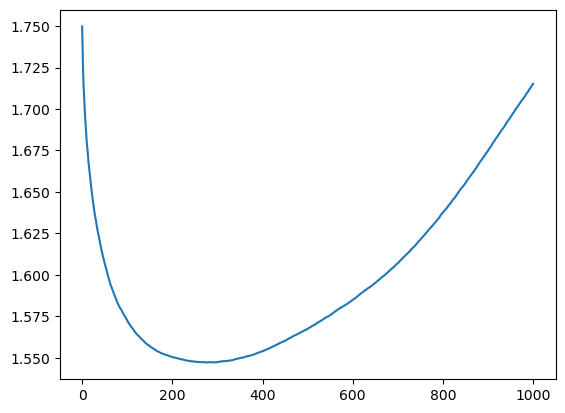

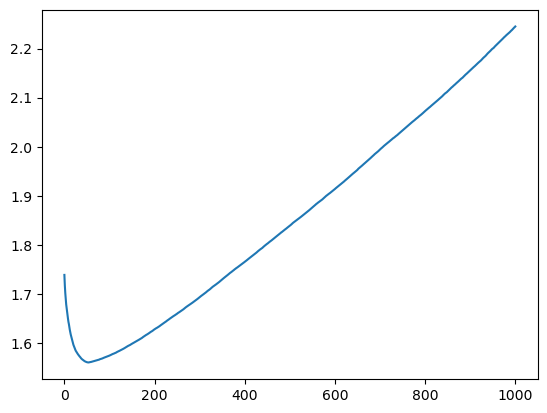

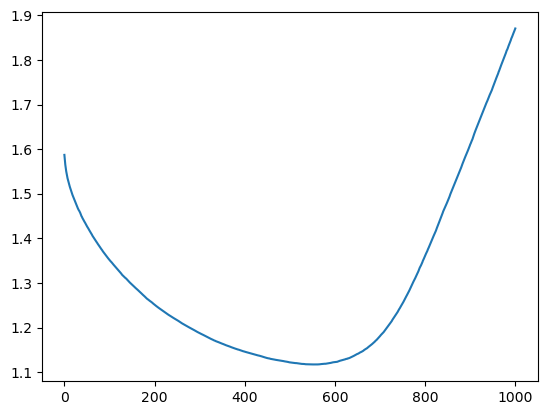

In [14]:
plot()

In [ ]:
i=0
size=2000
for i in [0]:
    for j in range(int(data_dim/2)):
        plt.subplots()
        d1 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][0], size=size)
        d2 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][-1], size=size)
        d3 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=true_cov[i], size=size)
        plt.scatter(d1[:,j], d1[:,j+1], label="init")
        plt.scatter(d2[:,j], d2[:,j+1], label="optimized")
        plt.scatter(d3[:,j], d3[:,j+1], label="true")
        plt.legend()

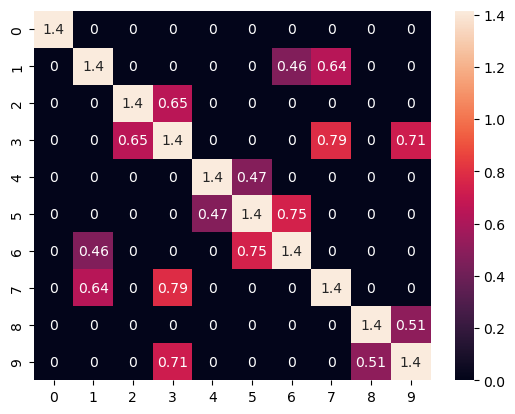

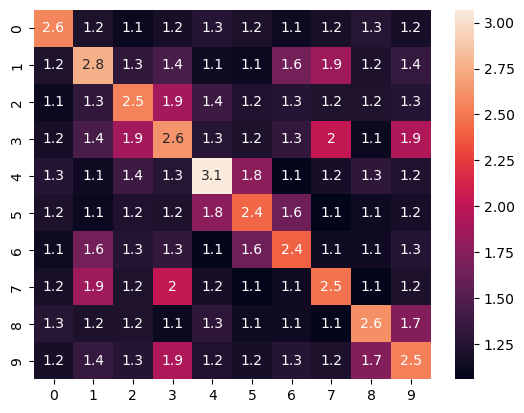

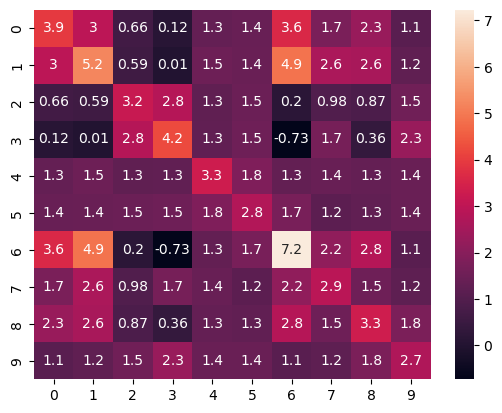

In [5]:
import seaborn as sns
for i in [0]:
    cov = np.round(cov, decimals=2)
    plt.subplots()
    sns.heatmap(true_cov[i], annot=True)
    plt.subplots()
    sns.heatmap(cov[i][0], annot=True)
    plt.subplots()
    sns.heatmap(cov[i][-1], annot=True)

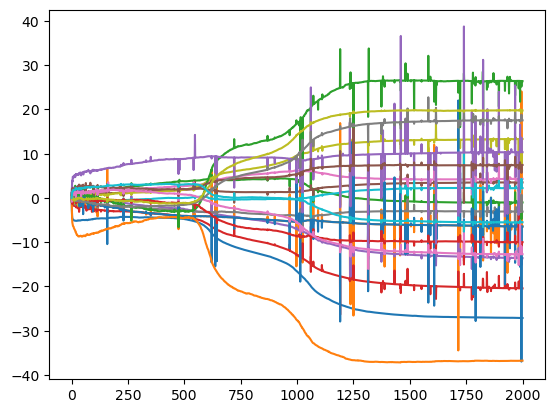

In [33]:
i=0
for j in range(len(par)):
    plt.plot(par[i,:,j])

<AxesSubplot:>

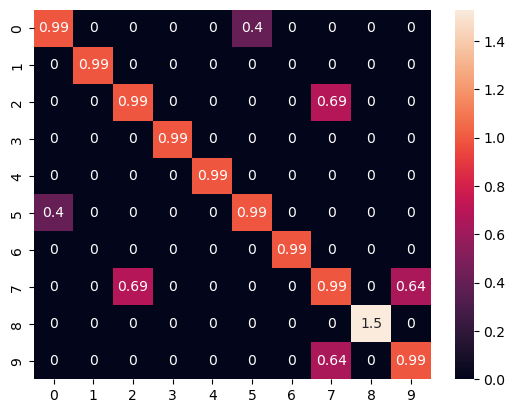

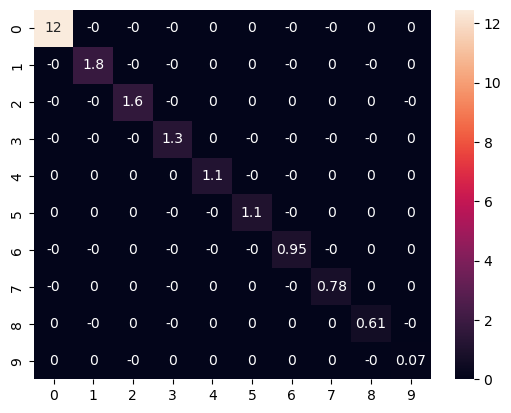

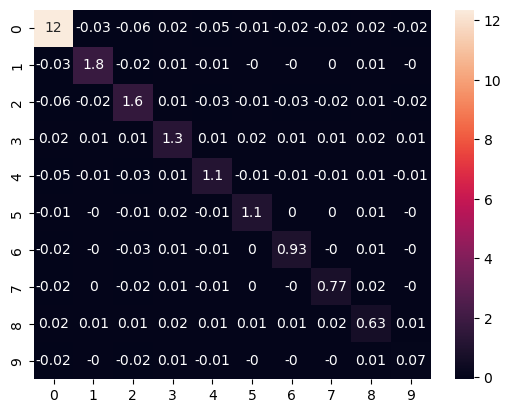

In [10]:


cov = np.round(cov, decimals=2)
sns.heatmap(true_cov[0], annot=True)
plt.subplots()
sns.heatmap(cov[0][0], annot=True)
plt.subplots()
sns.heatmap(cov[0][-1], annot=True)

/home/yokoyama/conda/envs/robust-gan/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/home/yokoyama/conda/envs/robust-gan/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


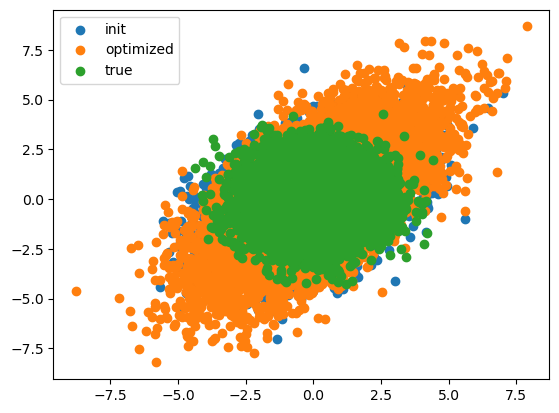

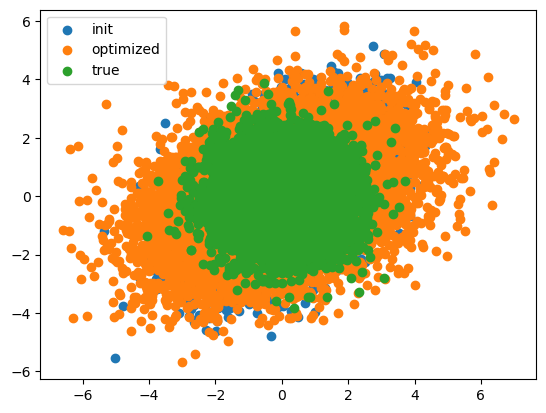

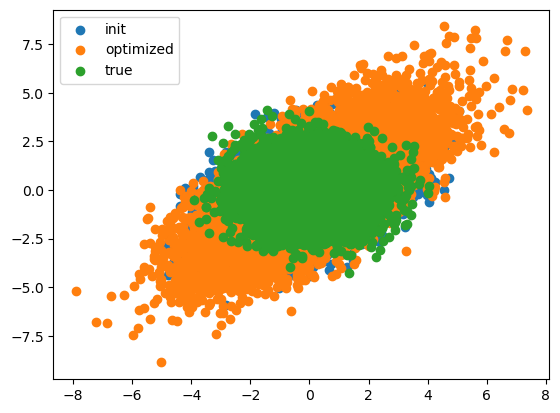

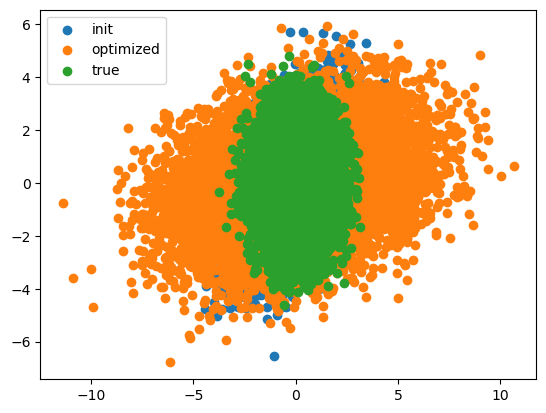

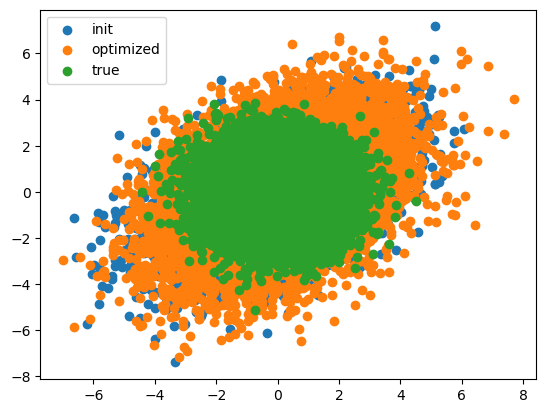

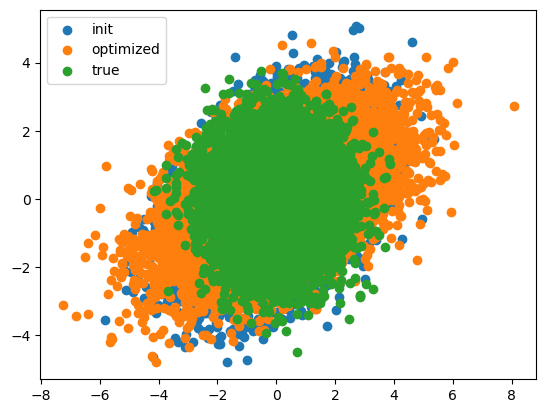

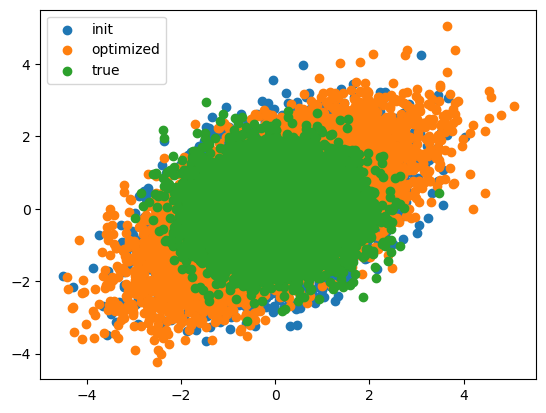

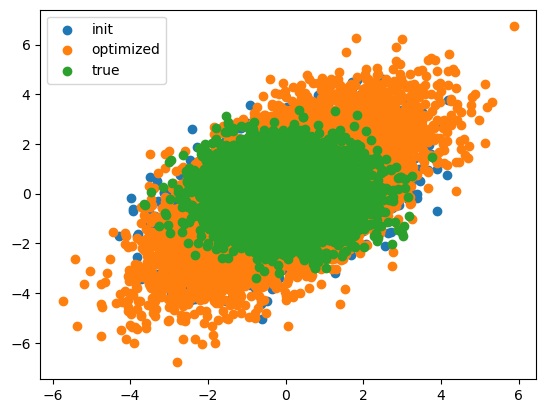

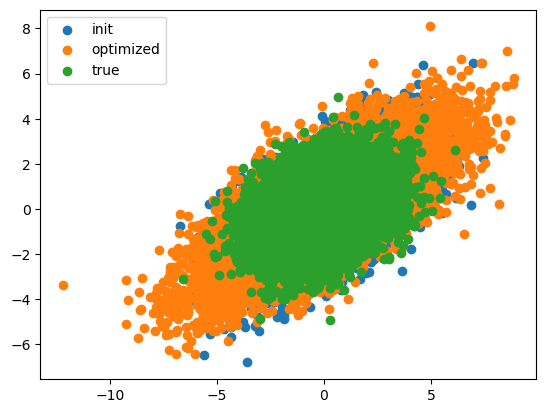

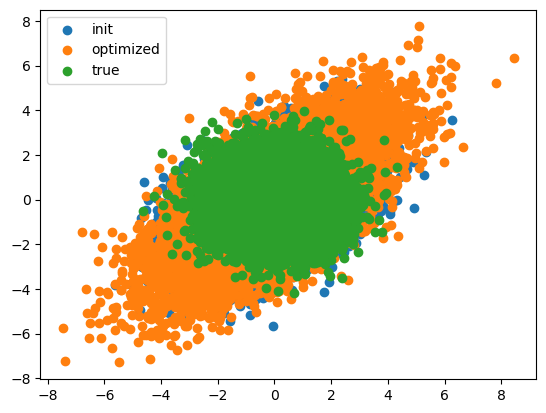

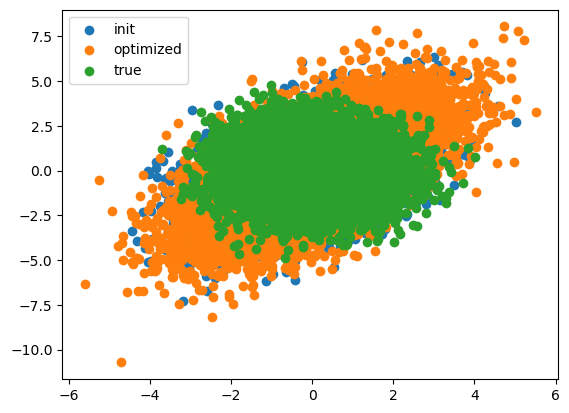

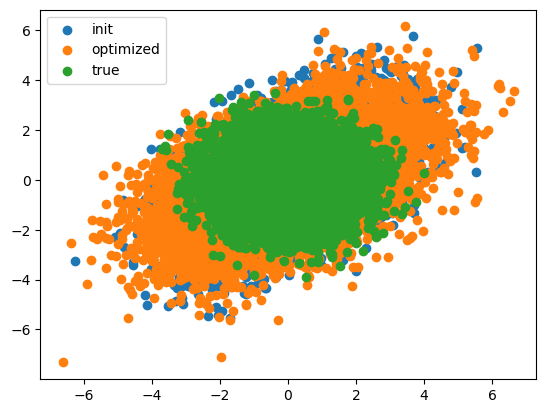

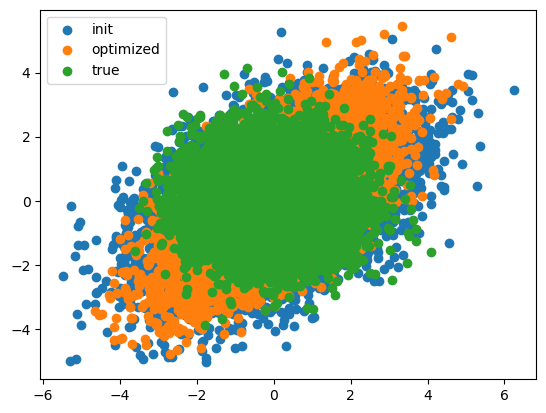

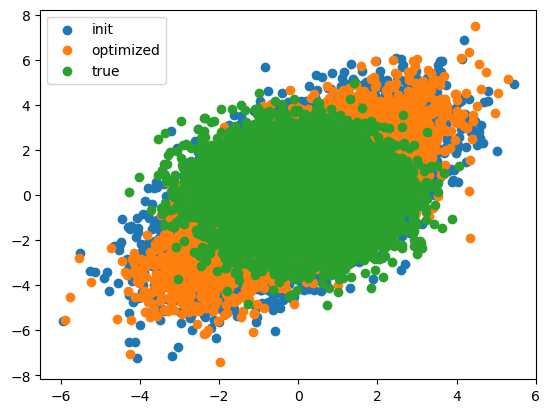

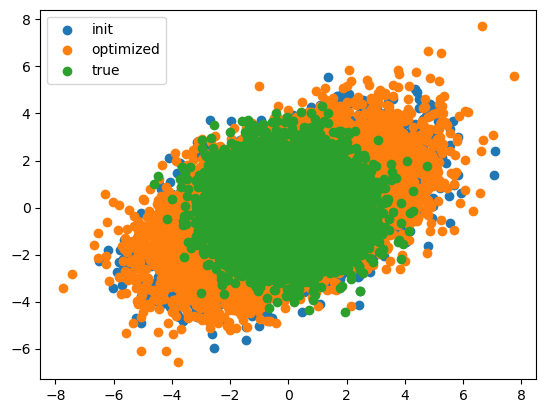

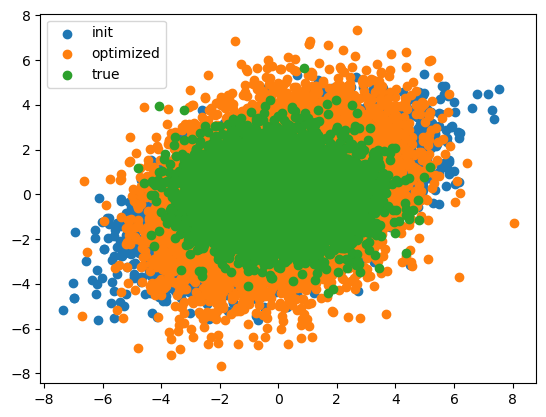

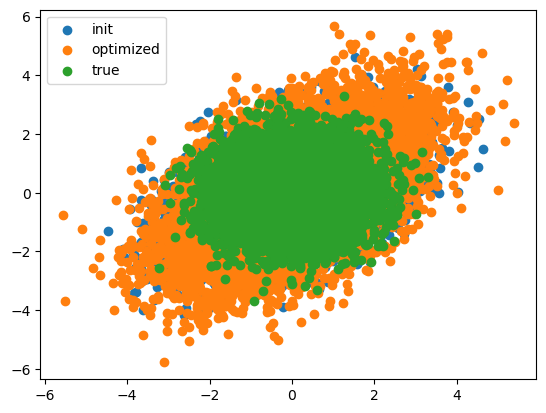

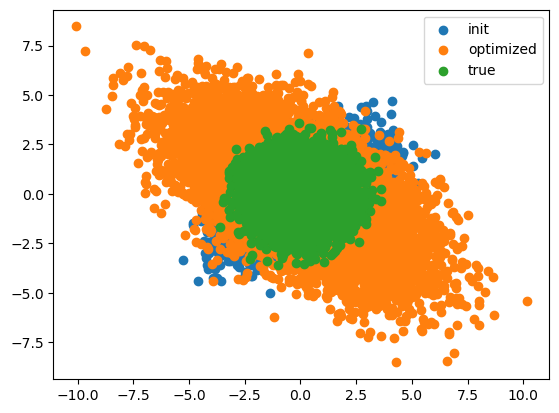

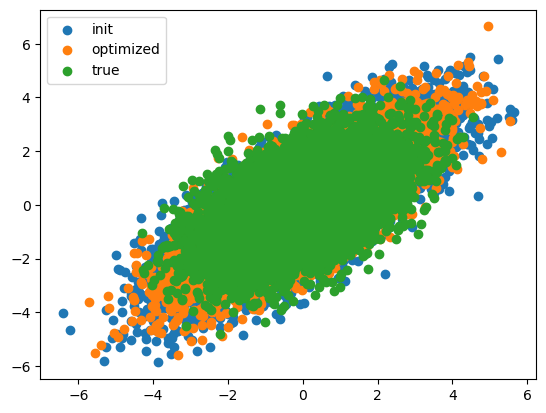

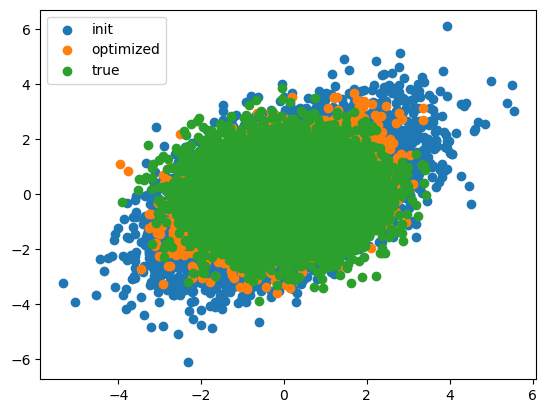

In [6]:
i=4
size=10000
for i in range(exper_iter):
    plt.subplots()
    d1 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][0], size=size)
    d2 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=cov[i][-1], size=size)
    d3 = np.random.multivariate_normal(mean=np.zeros(data_dim), cov=true_cov[i], size=size)
    plt.scatter(d1[:,0], d1[:,1], label="init")
    plt.scatter(d2[:,0], d2[:,1], label="optimized")
    plt.scatter(d3[:,0], d3[:,1], label="true")
    plt.legend()